In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Load datasets
load_data = pd.read_excel('C:\\Users\death\\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\LoadTexasERCOT.xlsx')
weather_data1 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation1.xlsx')
weather_data2 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation2.xlsx')
weather_data3 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation3.xlsx')



<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
C:\Users\death\AppData\Local\Temp\ipykernel_22032\2807815148.py:14: SyntaxWarning: invalid escape sequence '\d'
  load_data = pd.read_excel('C:\\Users\death\\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\LoadTexasERCOT.xlsx')
C:\Users\death\AppData\Local\Temp\ipykernel_22032\2807815148.py:15: SyntaxWarning: invalid escape sequence '\D'
  weather_data1 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NE

In [39]:
weather_data1.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,39.19,6,950
1,2012,1,1,1,30,44.45,5,950
2,2012,1,1,2,30,53.94,4,950
3,2012,1,1,3,30,63.77,2,960
4,2012,1,1,4,30,71.93,2,960


In [40]:
weather_data3.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,42.80,6,960
1,2012,1,1,1,30,56.15,5,960
2,2012,1,1,2,30,63.72,3,960
3,2012,1,1,3,30,69.80,2,960
4,2012,1,1,4,30,74.92,1,970


In [41]:

weather_data2.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,63.98,8,950
1,2012,1,1,1,30,49.59,6,950
2,2012,1,1,2,30,46.28,4,950
3,2012,1,1,3,30,52.89,3,960
4,2012,1,1,4,30,62.81,3,960


In [42]:
import pandas as pd

# Assuming weather_data1 is already defined and contains the necessary data

# Print column names to verify
print("Columns in weather_data1:", weather_data1.columns)

# Step 1: Preprocessing
# Convert to Datetime
weather_data1['DateTime'] = pd.to_datetime(weather_data1[['Year', 'Month', 'Day', 'Hour' ]])

# Drop the original columns
weather_data1.drop(columns=['Year', 'Month', 'Day', 'Hour' ], inplace=True)

# Display the first few rows to verify the changes
weather_data1.head()

Columns in weather_data1: Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')


,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,30,39.19,6,950,2012-01-01 00:00:00
1,30,44.45,5,950,2012-01-01 01:00:00
2,30,53.94,4,950,2012-01-01 02:00:00
3,30,63.77,2,960,2012-01-01 03:00:00
4,30,71.93,2,960,2012-01-01 04:00:00


In [43]:
weather_data3['DateTime'] = pd.to_datetime(weather_data2[['Year', 'Month', 'Day', 'Hour']])
weather_data3.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)
weather_data2['DateTime'] = pd.to_datetime(weather_data2[['Year', 'Month', 'Day', 'Hour']])
weather_data2.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)

In [44]:
merged_data = pd.merge(load_data, weather_data1, left_on='Hour_End', right_on='DateTime')
merged_data = pd.merge(merged_data, weather_data3, left_on='Hour_End', right_on='DateTime', suffixes=('_w1', '_w3'))
merged_data = pd.merge(merged_data, weather_data2, left_on='Hour_End', right_on='DateTime', suffixes=('_w1', '_w3', '_w2'))
merged_data.drop(columns=['DateTime_w1',  'DateTime_w3','Minute_w1','Minute_w3'], inplace=True)

In [45]:
merged_data.head(5)
# merged_data.drop(columns=['DateTime_w1', 'DateTime_w2', 'DateTime_w3', 'DateTime'], inplace=True)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT,Relative Humidity_w1,Temperature_w1,Pressure_w1,Relative Humidity_w3,Temperature_w3,Pressure_w3,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,2012-01-01 03:00:00,7337.789042,817.995707,1296.491345,631.940923,8461.317967,1961.909818,3946.994332,840.902848,25295.341984,63.77,2,960,69.80,2,960,30,52.89,3,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,6852.747302,883.708533,1329.677512,662.237775,8880.412604,1874.075024,4037.150795,892.341115,25412.350661,79.76,0,960,75.63,0,970,30,73.31,1,960,2012-01-01 06:00:00
2,2012-01-01 09:00:00,6855.467450,1023.689606,1385.977171,732.202793,10033.068791,2087.598732,4570.655862,1009.202331,27697.862737,48.63,6,960,45.26,6,970,30,46.52,7,960,2012-01-01 09:00:00
3,2012-01-01 12:00:00,7693.585339,974.715669,1362.688806,713.185070,9879.117595,2307.264867,4765.119321,964.065395,28659.742062,25.26,12,960,29.36,12,970,30,25.48,13,960,2012-01-01 12:00:00
4,2012-01-01 15:00:00,7700.107915,921.311601,1302.391474,672.284213,9320.712487,2253.088829,4533.564483,895.595594,27599.056595,23.44,12,960,27.66,11,970,30,25.14,13,960,2012-01-01 15:00:00


## Creating Input features


In [46]:
import holidays
import pandas as pd

# Assuming 'merged_data' DataFrame has 'Hour_End' column as datetime object
# Example: merged_data['Hour_End'] = pd.to_datetime(merged_data['Hour_End'])

# Step 1: Add 'Time of Day Index' (Hour of the day)
merged_data['TimeOfDayIndex'] = merged_data['Hour_End'].dt.hour

# Step 2: Add 'Day of the Week Index' (0 = Monday, 6 = Sunday)
merged_data['DayOfWeekIndex'] = merged_data['Hour_End'].dt.dayofweek

# Step 3: Add 'Holiday Flag' using the 'holidays' library for U.S. and Texas holidays
us_holidays = holidays.US(years=merged_data['Hour_End'].dt.year.unique(), state='TX')
merged_data['HolidayFlag'] = merged_data['Hour_End'].apply(lambda x: 1 if x in us_holidays else 0)

# Step 4: One-Hot Encode 'TimeOfDayIndex', 'DayOfWeekIndex', and 'HolidayFlag'
merged_data = pd.get_dummies(merged_data, columns=['TimeOfDayIndex', 'DayOfWeekIndex', 'HolidayFlag'], drop_first=True)
pd.set_option('display.max_columns', None)

# Drop 'DateTime' column if it exists
if 'DateTime' in merged_data.columns:
    merged_data.drop(['DateTime'], axis=1, inplace=True)

# Display the first few rows to verify the one-hot encoded features
print(merged_data.head())

# Count the number of rows where 'HolidayFlag_1' is 1 and 0
holiday_flag_1_count = merged_data['HolidayFlag_1'].sum()
holiday_flag_0_count = len(merged_data) - holiday_flag_1_count

print(f"Number of rows where HolidayFlag_1 is 1: {holiday_flag_1_count}")
print(f"Number of rows where HolidayFlag_1 is 0: {holiday_flag_0_count}")
print(merged_data.dtypes)


             Hour_End        COAST         EAST     FAR_WEST       NORTH  \
0 2012-01-01 03:00:00  7337.789042   817.995707  1296.491345  631.940923   
1 2012-01-01 06:00:00  6852.747302   883.708533  1329.677512  662.237775   
2 2012-01-01 09:00:00  6855.467450  1023.689606  1385.977171  732.202793   
3 2012-01-01 12:00:00  7693.585339   974.715669  1362.688806  713.185070   
4 2012-01-01 15:00:00  7700.107915   921.311601  1302.391474  672.284213   

        NORTH_C     SOUTHERN      SOUTH_C         WEST         ERCOT  \
0   8461.317967  1961.909818  3946.994332   840.902848  25295.341984   
1   8880.412604  1874.075024  4037.150795   892.341115  25412.350661   
2  10033.068791  2087.598732  4570.655862  1009.202331  27697.862737   
3   9879.117595  2307.264867  4765.119321   964.065395  28659.742062   
4   9320.712487  2253.088829  4533.564483   895.595594  27599.056595   

   Relative Humidity_w1  Temperature_w1  Pressure_w1  Relative Humidity_w3  \
0                 63.77         

In [47]:
# import pandas as pd

# # Assuming scaled_data is already defined and contains the necessary data

# def print_unique_values(data, num_values=7):
#     for column in data.columns:
#         unique_values = data[column].unique()[:num_values]
#         print(f"Column: {column}")
#         print(f"Unique Values: {unique_values}")
#         print()

# # Call the function to print unique values
# print_unique_values(scaled_data)

In [48]:
# X

In [49]:
# X.shape , y.shape

In [50]:
# y

## Train/test split

In [51]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building the l ass tm model

In [55]:
# Split the data into training and testing sets
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
# Assuming merged_data is already defined and contains the necessary data

# Exclude the datetime and 'ERCOT' columns before scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(merged_data.drop(columns=['Hour_End']))

# Convert scaled features back to DataFrame and re-include the 'Hour_End' and 'ERCOT' columns
scaled_data = pd.DataFrame(scaled_features, columns=merged_data.columns.drop(['Hour_End']))
# scaled_data['ERCOT'] = merged_data['ERCOT'].values

# scaled_data['Hour_End'] = merged_data['Hour_End'].values

#print dtype of all columns
print(scaled_data.dtypes)
scaled_data.head(5)

# Ensure all data is of type float64
scaled_data = scaled_data.astype(np.float64)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].drop(columns=['ERCOT']).values)
        y.append(data.iloc[i + time_steps]['ERCOT'])
    return np.array(X), np.array(y)

# Assuming scaled_data is already defined and contains the necessary data
time_steps = 18  # Example time steps
X, y = create_sequences(scaled_data, time_steps)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ensure all data is of type float32
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

# Define the model
model = Sequential()
model.add(LSTM(55, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))  # Output layer for load prediction

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
# Make predictions
# Make predictions
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions back to original scale
# Ensure the concatenated array has the correct shape
# Drop the last column from X_train and X_test to match the scaler's expected input shape
# Use the original scaler's feature range to inverse transform only the target variable

# Create a new scaler for the target variable 'ERCOT'
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.min_, target_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

# Inverse transform the predictions
scaled_train_predictions = target_scaler.inverse_transform(train_predictions)
scaled_test_predictions = target_scaler.inverse_transform(test_predictions)
scaled_y_train = target_scaler.inverse_transform(y_train.reshape(-1, 1))
scaled_y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the performance
# Evaluate the performance

# Evaluate the performance
# Evaluate the performance


COAST                   float64
EAST                    float64
FAR_WEST                float64
NORTH                   float64
NORTH_C                 float64
SOUTHERN                float64
SOUTH_C                 float64
WEST                    float64
ERCOT                   float64
Relative Humidity_w1    float64
Temperature_w1          float64
Pressure_w1             float64
Relative Humidity_w3    float64
Temperature_w3          float64
Pressure_w3             float64
Minute                  float64
Relative Humidity       float64
Temperature             float64
Pressure                float64
TimeOfDayIndex_3        float64
TimeOfDayIndex_6        float64
TimeOfDayIndex_9        float64
TimeOfDayIndex_12       float64
TimeOfDayIndex_15       float64
TimeOfDayIndex_18       float64
TimeOfDayIndex_21       float64
DayOfWeekIndex_1        float64
DayOfWeekIndex_2        float64
DayOfWeekIndex_3        float64
DayOfWeekIndex_4        float64
DayOfWeekIndex_5        float64
DayOfWee

C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0678 - val_loss: 0.0011
Epoch 2/3
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 9.1401e-04 - val_loss: 5.7354e-04
Epoch 3/3
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.5020e-04 - val_loss: 5.0696e-04
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [59]:
scaled_test_predictions ,scaled_test_predictions 

(array([[0.42502677],
        [0.742015  ],
        [0.22472872],
        ...,
        [0.602667  ],
        [0.38356066],
        [0.39367497]], dtype=float32),
 array([[0.42502677],
        [0.742015  ],
        [0.22472872],
        ...,
        [0.602667  ],
        [0.38356066],
        [0.39367497]], dtype=float32))

Training MAE: 0.017017805823026675, RMSE: 0.022640917681092956, R²: 0.9861382717837247
Testing MAE: 0.016994502272099914, RMSE: 0.022515843592429703, R²: 0.9870007035146013


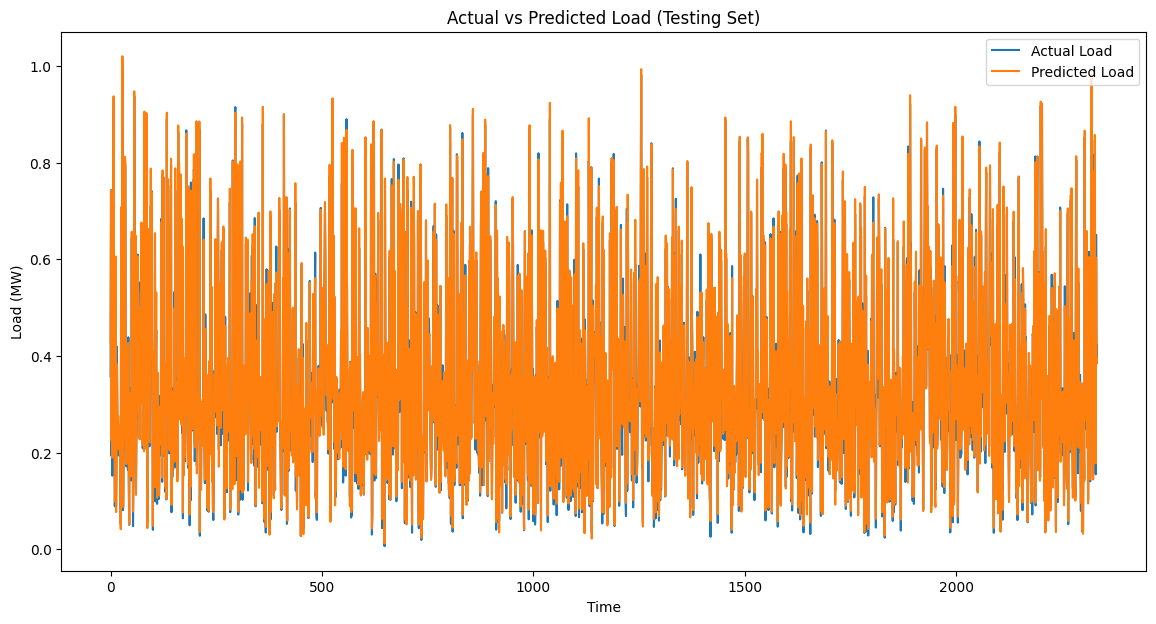

In [57]:
from sklearn.metrics import r2_score

# Calculate MAE and RMSE
train_mae = mean_absolute_error(scaled_y_train, scaled_train_predictions)
test_mae = mean_absolute_error(scaled_y_test, scaled_test_predictions)
train_rmse = np.sqrt(mean_squared_error(scaled_y_train, scaled_train_predictions))
test_rmse = np.sqrt(mean_squared_error(scaled_y_test, scaled_test_predictions))

# Calculate R² score
train_r2 = r2_score(scaled_y_train, scaled_train_predictions)
test_r2 = r2_score(scaled_y_test, scaled_test_predictions)

# Print the results
print(f'Training MAE: {train_mae}, RMSE: {train_rmse}, R²: {train_r2}')
print(f'Testing MAE: {test_mae}, RMSE: {test_rmse}, R²: {test_r2}')

# Step 8: Plot the results
plt.figure(figsize=(14, 7))
plt.plot(scaled_y_test, label='Actual Load')
plt.plot(scaled_test_predictions, label='Predicted Load')
plt.title('Actual vs Predicted Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()
plt.show()